In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = 'vehicles.csv'
pd.read_csv(data)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [157]:
gento = pd.read_csv('vehicles.csv')
# Convert "year" column to numeric, coercing errors to NaN
gento["year"] = pd.to_numeric(gento["year"], errors="coerce")
gento = gento.dropna(subset=["year"])
# Remove ".0" by converting to integer, then back to string
gento["year"] = gento["year"].apply(lambda x: str(int(x)) if not pd.isna(x) else str(x))
#Doing the same procedure for the coloumn odometer
gento["odometer"] = pd.to_numeric(gento["odometer"], errors="coerce")
gento["odometer"] = gento["odometer"].apply(lambda x: str(int(x)) if not pd.isna(x) else str(x))
#Data cleaning complete
print(gento)

                id   region  price  year manufacturer  \
27      7316814884   auburn  33590  2014          gmc   
28      7316814758   auburn  22590  2010    chevrolet   
29      7316814989   auburn  39590  2020    chevrolet   
30      7316743432   auburn  30990  2017       toyota   
31      7316356412   auburn  15000  2013         ford   
...            ...      ...    ...   ...          ...   
426875  7301591192  wyoming  23590  2019       nissan   
426876  7301591187  wyoming  30590  2020        volvo   
426877  7301591147  wyoming  34990  2020     cadillac   
426878  7301591140  wyoming  28990  2018        lexus   
426879  7301591129  wyoming  30590  2019          bmw   

                           model  condition    cylinders    fuel odometer  \
27      sierra 1500 crew cab slt       good  8 cylinders     gas    57923   
28                silverado 1500       good  8 cylinders     gas    71229   
29           silverado 1500 crew       good  8 cylinders     gas    19160   
30     

In [215]:

gento_cleaned = gento_cleaned.dropna(subset=["year"])

price = gento_cleaned["price"].values.reshape(-1, 1)
year = gento_cleaned["year"].values.reshape(-1, 1)

f1 = linear_model.LinearRegression(fit_intercept=False)

f1.fit(year, price)
f1.coef_
f1.predict([[2022]])
#Means that year is the independent value and price is the dependent. Shows 2022 year model has a coefficient of $60345 price for a car
#Increasing year, higher value for price

array([[60345.77635008]])

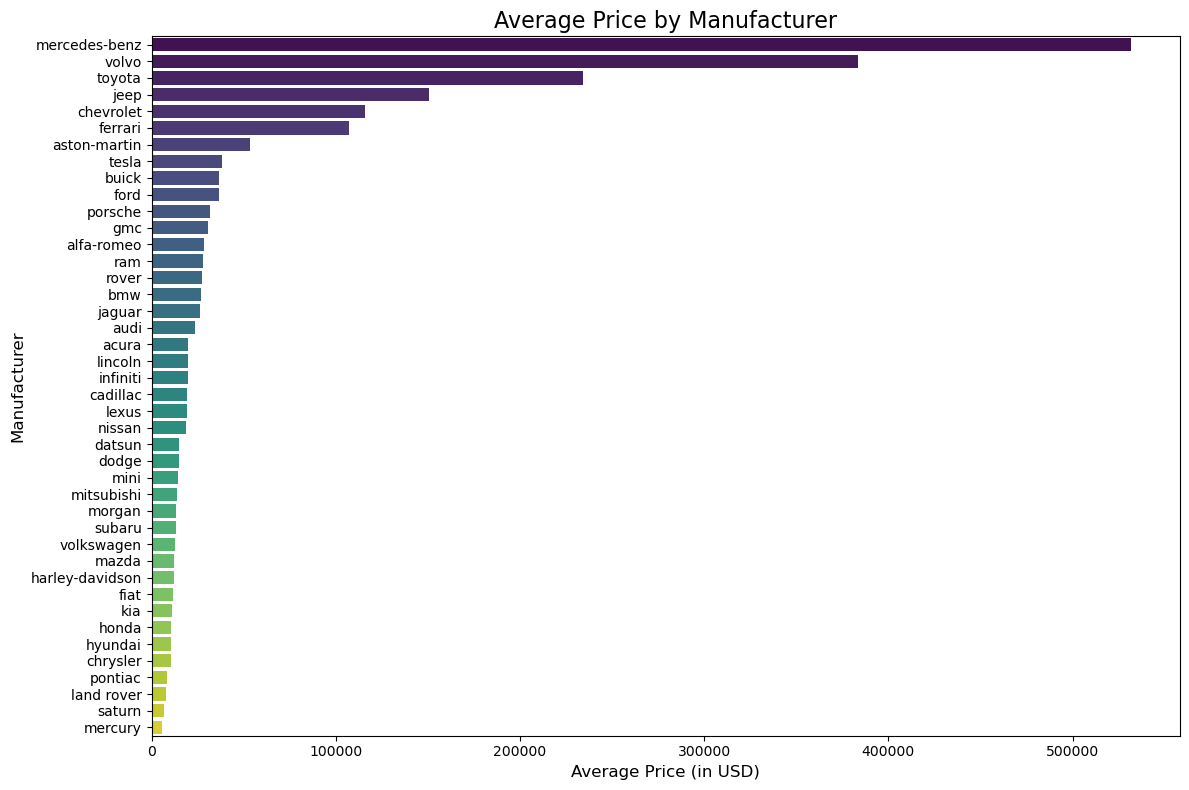

In [191]:
average_price_per_manufacturer = gento.groupby("manufacturer")["price"].mean().sort_values(ascending=False)

average_price_df = average_price_per_manufacturer.reset_index()
average_price_df.columns = ["Manufacturer", "Average Price"]

plt.figure(figsize=(12, 8))

sns.barplot(
    x="Average Price", 
    y="Manufacturer", 
    data=average_price_df, 
    hue="Manufacturer",  
    dodge=False,         
    legend=False,        
    palette="viridis"
)


plt.title("Average Price by Manufacturer", fontsize=16)
plt.xlabel("Average Price (in USD)", fontsize=12)
plt.ylabel("Manufacturer", fontsize=12)

plt.tight_layout()
plt.show()


In [233]:
from sklearn.model_selection import train_test_split

# Example: Splitting data into training and test sets
X = gento_cleaned[["odometer", "year"]]  # Features (independent variables)
y = gento_cleaned["price"]  # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [235]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get coefficients and intercept
print("Coefficients:", model.coef_)  # Slope of each feature
print("Intercept:", model.intercept_)  # Y-intercept


Coefficients: [ 7.81242051e-02 -2.52838971e+03]
Intercept: 5141338.295558064


In [237]:
# Predict on the test data
y_pred = model.predict(X_test)

# Compare actual vs. predicted values
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(comparison.head())


        Actual      Predicted
354438   32500  240320.945360
292122   12999   58642.864167
334232   20995   40597.923717
334949    5222  105531.699487
249440   26990   44805.515091


In [239]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 71645.54187759302
Mean Squared Error (MSE): 24619152136533.652
R-squared (R²): -2.3892307663420098e-05


In [241]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 71645.54187759302
Mean Squared Error (MSE): 24619152136533.652
R-squared (R²): -2.3892307663420098e-05


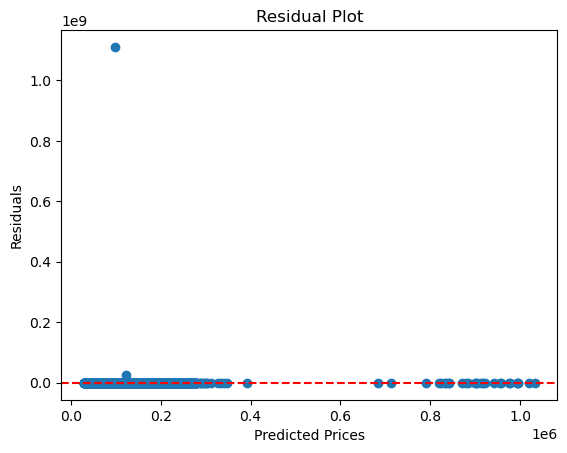

In [243]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [245]:
gento_cleaned["Predicted Price"] = model.predict(X)

# Group by manufacturer and compare predicted vs actual prices
comparison_by_manufacturer = gento_cleaned.groupby("manufacturer")[["price", "Predicted Price"]].mean()
print(comparison_by_manufacturer)


                         price  Predicted Price
manufacturer                                   
acura             22207.422828     53799.888897
alfa-romeo        29243.216867     43374.555228
aston-martin      54185.250000     63718.816173
audi              25514.108491     52006.577263
bmw               20786.615729     58411.923043
buick             49992.042857     64021.712152
cadillac          20272.627311     60600.613027
chevrolet         25169.034246     69905.852002
chrysler          10590.556529     66915.954210
datsun            13639.731707    152194.338314
dodge             15124.032675     64362.451937
ferrari          107713.609756     84110.937937
fiat              13882.501767     52289.977969
ford              47306.680111     69881.531495
gmc               35239.572950     64344.244526
harley-davidson   14464.750000     75148.706710
honda             11083.564862     66937.175362
hyundai           11589.155411     56544.402744
infiniti          21446.474662     53726

In [259]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np


In [261]:
# Map condition to numerical values (example mapping)
condition_mapping = {
    "new": 5,
    "like new": 4,
    "excellent": 3,
    "good": 2,
    "fair": 1,
    "salvage": 0
}

# Apply mapping
gento_cleaned["condition"] = gento_cleaned["condition"].map(condition_mapping)

# Drop rows with NaN condition values
gento_cleaned = gento_cleaned.dropna(subset=["condition", "price"])


In [263]:
X = gento_cleaned[["condition"]]  # Independent variable
y = gento_cleaned["price"]        # Dependent variable


In [265]:
model = LinearRegression()


In [267]:
from sklearn.model_selection import KFold

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate R² for each fold
cv_scores = cross_val_score(model, X, y, cv=kf, scoring="r2")
print("R-squared for each fold:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

# Generate cross-validated predictions
y_pred = cross_val_predict(model, X, y, cv=kf)


R-squared for each fold: [-3.28404744e-05 -6.67571586e-03 -4.78117747e-03  5.57476453e-07
 -2.14052802e-05]
Mean R-squared: -0.002302116322800263


In [269]:
# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 122718012839992.33
R-squared (R²): -1.4009846695639538e-05


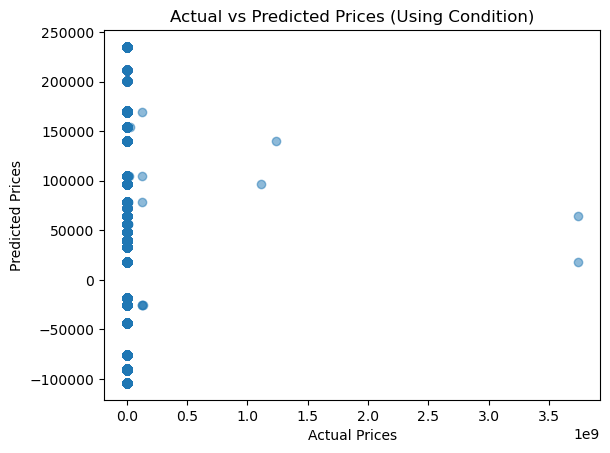

In [271]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Using Condition)")
plt.show()


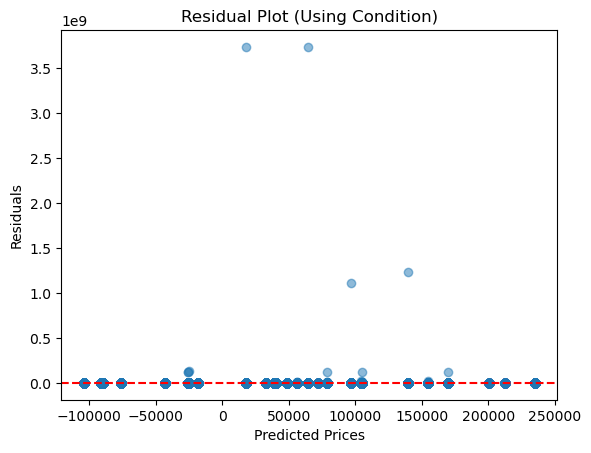

In [273]:
residuals = y - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (Using Condition)")
plt.show()


In [275]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [279]:
param_grid = {
    'n_estimators': [100, 200],  # Reduced range
    'max_depth': [10, 20],        # Reduced values
}


In [299]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameter distribution (instead of a grid of values)
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, 
                                   n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   2.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   2.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700

0